<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
# import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [4]:
df = pd.read_csv('data.csv', sep=',')
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [37]:
categorical = [category for category in df.select_dtypes(include='object').columns]

print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [38]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [40]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [42]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [43]:
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [45]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in 

Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [49]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

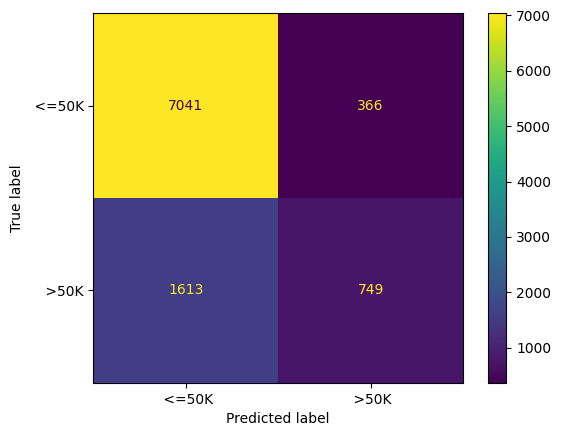

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      7407
        >50K       0.67      0.32      0.43      2362

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [60]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7939
Test set score: 0.7974


In [61]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [62]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2026


In [66]:
# FP w stosunku do wszystkich pozytywów:
print(FP / (FP + TP) * 100, "%")

4.941271769947347 %


In [67]:
# FP w stosunku do wszystkich pozytywów:
print(FN / (FN + TN) * 100, "%")

68.28958509737511 %


Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

## Uczenie modelu dla kolumny 'race'

In [69]:
X = df.drop('race', axis=1)
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in 

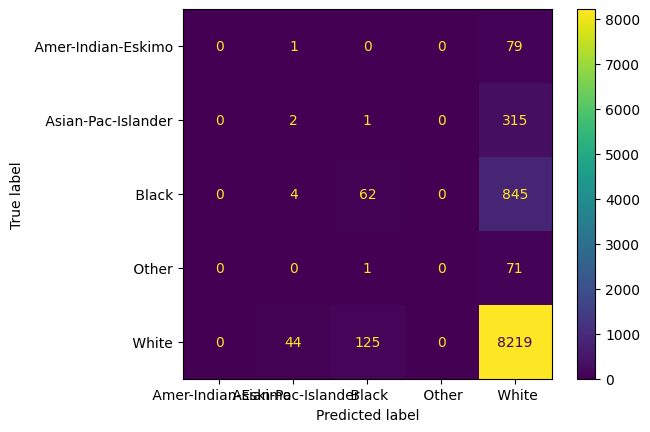

In [70]:
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()

In [71]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

 Amer-Indian-Eskimo       0.00      0.00      0.00        80
 Asian-Pac-Islander       0.04      0.01      0.01       318
              Black       0.33      0.07      0.11       911
              Other       0.00      0.00      0.00        72
              White       0.86      0.98      0.92      8388

           accuracy                           0.85      9769
          macro avg       0.25      0.21      0.21      9769
       weighted avg       0.77      0.85      0.80      9769



/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [74]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3333


## Uczenie modelu dla kolumny - native_country


In [75]:
X = df.drop('native_country', axis=1)
y = df['native_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in 

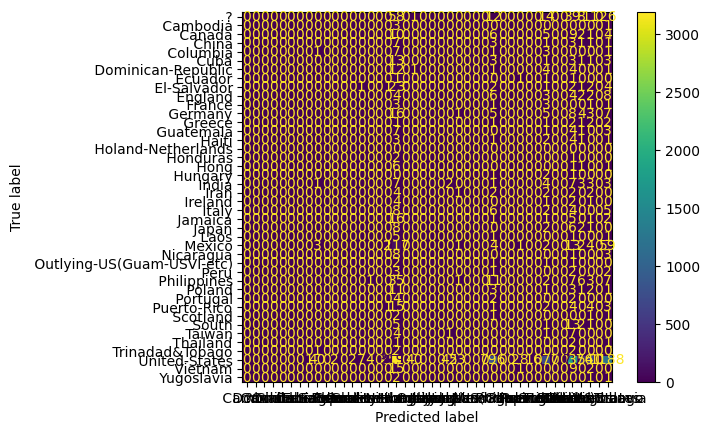

In [76]:
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()

In [77]:
print(classification_report(y_test, y_pred))

                             precision    recall  f1-score   support

                          ?       0.00      0.00      0.00       169
                   Cambodia       0.00      0.00      0.00         4
                     Canada       0.00      0.00      0.00        37
                      China       0.00      0.00      0.00        17
                   Columbia       0.00      0.00      0.00        13
                       Cuba       0.00      0.00      0.00        25
         Dominican-Republic       0.00      0.00      0.00        23
                    Ecuador       0.00      0.00      0.00         4
                El-Salvador       0.00      0.00      0.00        37
                    England       0.00      0.00      0.00        29
                     France       0.00      0.00      0.00         9
                    Germany       0.00      0.00      0.00        49
                     Greece       0.00      0.00      0.00        10
                  Guatemala      

/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dominik/anaconda3/envs/dominiktomalczyk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## Wnioski

O ile w klasyfikacji binarnej (kolumna income) model nie poradził sobie najgorzej tak w przypadku innych wyniki były gorsze. Jednym z powodów takich wyników może być założenie o niezależności elementów, warto by rozważyć przynajmniej w celu weryfikacji wyników innego modelu. 

* W przypadku klasyfikacji kolumny income, model zwrócił znacznie lepsze wyniki niż w kolejnych klasyfikacjach. Wyniki nie są najgorsze, jednak nie są też szczególnie dobre. Znów mamy doczynienia z niezrównoważonym zbiorem bo mamy dużą przewagę rekordów <=50k. Jednak Cześć wyników została sklasyfikowana poprawnie. Wyniki dają nadzieje, że wraz z feature enginnerigiem lub uzupełnieniem danych można by się spodziewać na prawdę dobrych wyników.

* W przypadku klasyfikacji kolumny race, cieżko ocenić model, bo większośc rekordów ma kategorię 'white', model faktycznie w przypadku tej kategorii ma dobre wyniki. Jednak ciężko ocenić to na podstawie innych kolumn bo takich jest po prostu za mało. Wynik taki może dawać złudnie dobre rezultaty, przez to że (prawie) wszystkie wartości z X_test klasyfikuje do 'white' co jest lwią częscią danych. 

* W przypadku klasyfikajci kolumny 'native_country' mamy bardzo słaby rezultat, wynika to z tego że kategorii jest bardzo dużo, w przypadku niektórych kategorii są dosłownie 3 rekordy z tej kategorii. Myśle że warto tutaj byłoby sięgnąć po inny model np. RandomForest. Można też rozważyć usunięcie kategorii w których mamy bardzo mało rekordów i utworzyć nową np. 'other'. Ilość kategorii w klasyfikacji wpływa na to że confussion_matrix jest zupełnie nieczytelne.